While there’s less rhyme or reason to the rate at which teams convert those scoring chances into goals, modern analysis has ascertained that possession plays a big role in creating offensive opportunities, and that effective short passing — **fueled largely by having pass targets move to soft spots in the defense before ever receiving the ball** — is strongly associated with building and maintaining possession.

• We could try to identify the weakest link on each team, or suggest trades that would make a team much better by focusing on the weaker players than the superstars.

• We could show that the superstars' salaries would be better spent on improving two or three cheaper players who would make the team better as a whole.

• We could build a "team builder" tool that helps players in Fifa 19 who want to create a custom team figure out which players to pick to create the best overall team given a salary cap

**MVP** = a model to find weakest for any team and provide suggestion on players to trade for to improve team

**Stretch goal** = dinamic model that displays weakest link of letting team of players' chosen by user

**Provide Vu:** Reduced number of columns to show

• Player profile (name, age, height, weight, nationality, picture)

• 6 to 8 features for users to see per player

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df_ratings = pd.read_csv('Fifa19_TeamRatings.csv')

**Column info:**

Age, Nationality, Overall, Potential, Club, Value, Wage, Preferred Foot, International Reputation, Weak Foot, Skill Moves, Work Rate, Position, Jersey Number, Joined, Loaned From, Contract Valid Until, Height, Weight, LS, ST, RS, LW, LF, CF, RF, RW, LAM, CAM, RAM, LM, LCM, CM, RCM, RM, LWB, LDM, CDM, RDM, RWB, LB, LCB, CB, RCB, RB, Crossing, Finishing, Heading, Accuracy, ShortPassing, Volleys, Dribbling, Curve, FKAccuracy, LongPassing, BallControl, Acceleration, SprintSpeed, Agility, Reactions, Balance, ShotPower, Jumping, Stamina, Strength, LongShots, Aggression, Interceptions, Positioning, Vision, Penalties, Composure, Marking, StandingTackle, SlidingTackle, GKDiving, GKHandling, GKKicking, GKPositioning, GKReflexes, and Release Clause

In [5]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position', 'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Relea

In [6]:
df = df.drop('Unnamed: 0', axis=1)

In [7]:
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [8]:
df.shape

(18207, 88)

In [9]:
df.Special.value_counts()

1745    47
1628    46
1728    46
1655    42
1740    42
1667    41
1649    41
1691    41
1599    40
1694    40
1748    40
1638    40
1620    40
1713    39
1575    39
1833    39
1679    38
1683    38
1448    38
1749    38
1693    38
1800    38
1680    38
1760    38
1763    38
1651    37
1543    37
1813    37
1565    36
1625    36
1781    36
1724    36
1739    36
1792    36
1588    36
1719    36
1617    36
1815    36
1511    35
1611    35
1650    35
1587    35
1696    35
1632    35
1711    35
1647    35
1802    35
1612    35
1668    35
1633    35
1675    35
1535    35
1770    34
1648    34
1686    34
1701    34
1669    34
1772    34
1723    34
1684    34
1759    34
1692    34
1698    34
1670    34
1699    34
1731    34
1707    33
1527    33
1705    33
1823    33
1817    33
1690    33
1593    32
1790    32
1762    32
1782    32
1808    32
1766    32
1597    32
1676    32
1758    32
1708    32
1700    32
1738    32
1706    32
1626    32
1610    32
1542    32
1541    32
1630    32
1662    32

In [10]:
df.describe()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.

In [11]:
df.isna().sum()

ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Real Face                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
LS                           2085
ST                           2085
RS            

In [12]:
# Count of Goal Keepers
(df['Position'] == 'GK').sum()

2025

In [13]:
# Unique Clubs in df
df['Club'].nunique()

651

In [14]:
df_ratings.head()

,Name,League,ATTACK,MIDFIELD,DEFENCE,OVERALL
0,FC Barcelona,LaLiga Santander,87,85,85,86
1,Real Madrid,LaLiga Santander,83,88,84,86
2,FC Bayern,Bundesliga,90,84,85,85
3,Juventus,Serie A TIM,89,83,85,85
4,Manchester City,Premier League,86,88,83,85


In [15]:
df_ratings.shape

(652, 6)

## Grouping Players Dataset by Teams

In [16]:
df_teams = df

### Dropping NaNs in `Club` and `Position` Features

In [17]:
df_teams = df_teams.dropna(subset=['Club', 'Position'], axis=0)

In [18]:
# 651 Teams
len(df_teams['Club'].value_counts(dropna=False))

651

### Goal Keeper rows: Replacing NaNs with 0s in `Position` Column

In [19]:
# Count of Goal Keepers
(df_teams['Position'] == 'GK').sum()

1992

In [20]:
# Rapacing NaNs with 0s for Goal Keeper rows
df_teams.iloc[:,27:53] = df_teams.iloc[:,27:53].fillna(value=0)

C:\Users\Gutierrez\Anaconda3\envs\py3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


### Dropping `Joined` and Replacing NaNs in `Release Clause` and `Loaned From`

In [21]:
# Dropping 'Joined' column
df_teams = df_teams.drop('Joined', axis=1)

In [22]:
# Replacing NaNs in 'Release Clause' and 'Loaned From' features
df_teams['Release Clause'] = df_teams['Release Clause'].fillna(0)
df_teams['Loaned From'] = df_teams['Loaned From'].fillna('Not Loaned')

In [23]:
df_teams.isna().sum()

ID                          0
Name                        0
Age                         0
Photo                       0
Nationality                 0
Flag                        0
Overall                     0
Potential                   0
Club                        0
Club Logo                   0
Value                       0
Wage                        0
Special                     0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Body Type                   0
Real Face                   0
Position                    0
Jersey Number               0
Loaned From                 0
Contract Valid Until        0
Height                      0
Weight                      0
LS                          0
ST                          0
RS                          0
LW                          0
LF                          0
CF                          0
RF                          0
RW        

### Adding `Field Position` Feature

In [24]:
# Positions to Clasiffy as Goal Keeper, Attack, Midfield, or Defence
df_teams['Position'].unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB'], dtype=object)

In [25]:
defense = ['CB', 'RB', 'LB', 'RWB', 'LWB', 'RCB', 'LCB']
midfield = ['RW', 'LW', 'RM', 'LM', 'CM', 'CDM', 'CAM', 'RCM', 'LCM', 'LAM', 'RAM', 'RDM', 'LDM']
attack = ['ST', 'CF', 'RF', 'LF', 'RS', 'LS']
goalkeeper = ['GK']

In [26]:
# function to create Field Position for each player
def field(row):
    if row['Position'] in defense:
        val = 'Defense'
    elif row['Position'] in midfield:
        val = 'Midfield'
    elif row['Position'] in attack:
        val = 'Attack'
    else:
        val = 'GK'
    return val

In [27]:
df_teams['Field Position'] = df_teams.apply(field, axis=1)

In [28]:
df_teams.shape

(17918, 88)

### Editing values in `Value` and `Wage` columns

In [29]:
df_teams['Value'] = df_teams['Value'].astype(str)

In [30]:
def change_value(row):
    if (row['Value'][-1]=='K'):
        return int(pd.to_numeric(row['Value'][1:-1])*1000)
    elif (row['Value'][-1]=='M'):
        return int(pd.to_numeric(row['Value'][1:-1])*1000000)
    elif (row['Value'][-1]=='0'):
        return 0

In [31]:
df_teams['Value'] = df_teams.apply(change_value, axis=1)

In [32]:
df_teams['Value'].head()

0    110500000
1     77000000
2    118500000
3     72000000
4    102000000
Name: Value, dtype: int64

In [33]:
def change_wage(row):
    if (row['Wage'][-1]=='K'):
        return (pd.to_numeric(row['Wage'][1:-1]))
    elif (row['Wage'][-1]=='0'):
        return 0

In [34]:
df_teams['Wage'] = df_teams.apply(change_wage, axis=1)

In [35]:
df_teams['Wage'].head()

0    565
1    405
2    290
3    260
4    355
Name: Wage, dtype: int64

### Applying Player Performance Ratio

In [36]:
df_teams['Performance Ratio'] = df_teams['Wage'] / df_teams['Overall']

In [37]:
df_teams['Performance Ratio'].head()

0    6.010638
1    4.308511
2    3.152174
3    2.857143
4    3.901099
Name: Performance Ratio, dtype: float64

In [38]:
df_teams['Performance Ratio'].describe()

count    17918.000000
mean         0.132839
std          0.263323
min          0.012195
25%          0.019231
50%          0.046875
75%          0.128571
max          6.010638
Name: Performance Ratio, dtype: float64

In [39]:
df_teams.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Field Position,Performance Ratio
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,110500000,565,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,Not Loaned,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,Attack,6.010638
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,77000000,405,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,Not Loaned,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,Attack,4.308511
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,118500000,290,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,Not Loaned,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,Midfield,3.152174
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,72000000,260,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,Not Loaned,2020,6'4,168lbs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,GK,2.857143
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,102000000,355,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,Not Loaned,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,Midfield,3.901099


### Applying Player "Overvalue" Sorting within Teams

In [40]:
df_teams = df_teams.sort_values(by=['Club', 'Performance Ratio'], ascending=False)

### Adding New Feature: Field Position Num (Numerically Encoded Field Positions)

In [41]:
df_teams['Field Position'].unique()

array(['Attack', 'Defense', 'Midfield', 'GK'], dtype=object)

In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_teams['Field Position Num'] = le.fit_transform(df_teams['Field Position'])

In [43]:
df_teams['Field Position Num'].head()

7228    0
5678    1
6421    3
5067    0
8798    3
Name: Field Position Num, dtype: int32

### Getting Club players

In [44]:
def get_club_players(club):
    if club in df_teams.Club.values:
        print('Found', club)
        club_players = []
        club = df_teams['Club'] == club
        vals = df_teams.loc[club]
        # desc_sorted_performance_ratios = sorted(vals['Performance Ratio'], reverse=True)
        # print('desc_sorted_performance_ratios:', desc_sorted_performance_ratios)
        names = list(vals.Name)
        performance_ratios = list(vals['Performance Ratio'])
        overall_ratings = list(vals.Overall)
        # club_dict = dict(zip(names, zip(performance_ratios, overall_ratings)))
        # print('club_dict:', club_dict)
        club_list = list(zip(names, performance_ratios, overall_ratings))
        # print('club_list:', club_list)
        desc_club_list_by_performance_ratio = sorted(club_list, key=lambda x: x[1], reverse=True)
        print('Suggested trades (players with top 2 performance ratios) are:',
              desc_club_list_by_performance_ratio[:2], '\n')
        # print('\ndesc_club_list_by_performance_ratio:\n\n', desc_club_list_by_performance_ratio)
        # club_players.append([vals.Name, vals['Performance Ratio'], vals.Overall])
        # print(club_players)
        # return club_players
    else:
        return 'Your club entry was not located in db.'

In [45]:
# Test get_club_players, using Juventus as example

get_club_players('Juventus'), get_club_players('FC Barcelona')

Found Juventus
Suggested trades (players with top 2 performance ratios) are: [('Cristiano Ronaldo', 4.308510638297872, 94), ('G. Chiellini', 2.4157303370786516, 89)] 

Found FC Barcelona
Suggested trades (players with top 2 performance ratios) are: [('L. Messi', 6.01063829787234, 94), ('L. Suárez', 5.0, 91)] 



(None, None)

### Recommender System

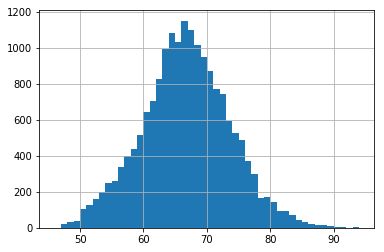

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
df_teams['Overall'].hist(bins=48)

In [55]:
df_teams['Overall'].describe()

count    17918.000000
mean        66.236801
std          6.929243
min         46.000000
25%         62.000000
50%         66.000000
75%         71.000000
max         94.000000
Name: Overall, dtype: float64

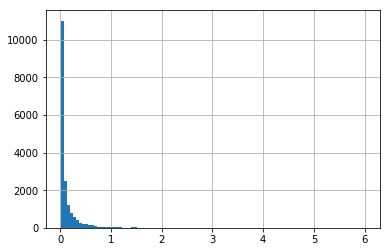

In [54]:
df_teams['Performance Ratio'].hist(bins=100)

In [75]:
df_teams['Performance Ratio'].describe()

count    17918.000000
mean         0.132839
std          0.263323
min          0.012195
25%          0.019231
50%          0.046875
75%          0.128571
max          6.010638
Name: Performance Ratio, dtype: float64

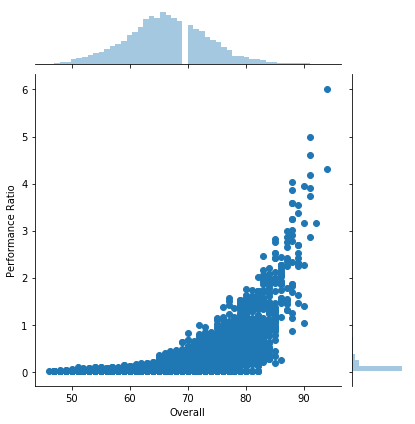

In [76]:
# relationship between 'Overall' and 'Performance_ratio'
# this shows that there are players with `Overall` in lower 80s that are Undervalued
import seaborn as sns
sns.jointplot(x='Overall', y='Performance Ratio', data=df_teams)

In [52]:

# dataframe with features for correlation function
df_attributes = df_teams[['Field Position Num', 'Overall', 'Potential', 'Crossing', 'Finishing', 
                          'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
                          'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 
                          'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 
                          'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 
                          'Vision', 'Penalties', 'Composure', 'Marking']]
# name of player
p_name = 'C. Immobile'

# this gets index of player given a name
p_index = df_teams[df_teams['Name']==p_name].index.values[0]

# getting the 'Overall' and 'Potential' based on index or Name
p_overall = df_teams[df_teams['Name']==p_name].Overall.values[0]
p_potential = df_teams[df_teams['Name']==p_name].Potential.values[0]
p_position = df_teams[df_teams['Name']==p_name]['Field Position Num'].values[0]

# Wage for player passed in
p_wage = df_teams[df_teams['Name']==p_name].Wage.values[0]

p_attributes = df_attributes.iloc[p_index]

# filtering attributes for overvalued:
filtered_attributes = df_attributes[(df_attributes['Overall'] > p_overall-10) 
                                    & (df_attributes['Potential'] > p_potential-10)
                                    & (df_attributes['Field Position Num'] == p_position)]

#filtering attributes for weaker players:
filtered_weak_attributes = df_attributes[(df_attributes['Overall'] > p_overall) 
                                    & (df_attributes['Potential'] > p_potential)]

In [55]:
# Uses this to replace overpaid players -  top 5 suggestes
suggested_players = filtered_attributes.corrwith(p_attributes, axis=1)
suggested_players = suggested_players.sort_values(ascending=False).head(5)
suggested_players

523    0.916458
267    0.915041
329    0.909124
272    0.897876
719    0.897423
dtype: float64

In [74]:
suggested_players_tuple = list(zip(suggested_players,suggested_players.index))
suggested_p_index = sorted(suggested_players_tuple, reverse=True)[0][1]
suggested_p_index

523

In [76]:
# Budget remaining when picking top suggested player
# (Wage of overpaid player - Wage of suggested player)
budget_remaining = (p_wage - df_teams[df_teams.index==suggested_p_index].Wage.values[0])*1000
budget_remaining

70000

In [54]:
# Use this for replacing weaker players - top 5 suggestions
suggested_strong_players = filtered_weak_attributes.corrwith(p_attributes, axis=1)
suggested_strong_players = suggested_players.sort_values(ascending=False).head(5)
suggested_strong_players

48    0.852161
43    0.840960
87    0.839494
23    0.792933
10    0.791852
dtype: float64

In [50]:
df_teams[df_teams.Name == 'L. Messi']

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Field Position,Performance Ratio,Field Position Num
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,110500000,565,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,Not Loaned,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,Attack,6.010638,0


In [51]:
df_teams[df_teams.index == 48]

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Field Position,Performance Ratio,Field Position Num
48,192387,C. Immobile,28,https://cdn.sofifa.org/players/4/19/192387.png,Italy,https://cdn.sofifa.org/flags/27.png,87,87,Lazio,https://cdn.sofifa.org/teams/2/light/46.png,52000000,115,2009,Right,3.0,4.0,3.0,High/ Medium,Normal,Yes,ST,17.0,Not Loaned,2023,6'1,187lbs,84+3,84+3,84+3,79+3,82+3,82+3,82+3,79+3,78+3,78+3,78+3,77+3,70+3,70+3,70+3,77+3,60+3,58+3,58+3,58+3,60+3,58+3,55+3,55+3,55+3,58+3,55.0,90.0,81.0,74.0,87.0,83.0,70.0,51.0,49.0,83.0,78.0,85.0,77.0,87.0,63.0,86.0,77.0,80.0,76.0,80.0,77.0,40.0,91.0,65.0,78.0,81.0,34.0,33.0,32.0,6.0,8.0,15.0,12.0,6.0,€88.4M,Attack,1.321839,0


In [163]:
# this gets index of player given a name
df_teams[df_teams['Name']=='C. Immobile'].index.values[0]

48

In [169]:
# getting the 'Overall' and 'Potential' based on index or Name
df_teams[df_teams['Name'] == 'C. Immobile'].Overall.values[0]
df_teams[df_teams['Name'] == 'C. Immobile'].Potential.values[0]

87

In [180]:
# filtering for a player with wage lower than overvalued player
df_teams[df_teams['Name'] == 'C. Immobile'].Wage.values[0]
#df_teams[df_teams['Wage'] < 'C. Immobile'].Overall.values[0]

115

In [ ]:
# finding player based on index
suggested_player_index = df_teams[df_teams['Name']==p_name].index.values[0]